In [51]:
# Importando las libreriias que utilizaremos
! pip install pandas
! pip install matplotlib
! pip install folium
! pip install seaborn
! pip install numpy
import pandas as pd
import matplotlib as plt
import seaborn as sns
import folium 
import numpy as np
import requests


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ashpe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ashpe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ashpe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ashpe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ashpe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importación de datos

In [52]:
# Importando los datos de dataset a usar a una variable llamada df
df = pd.read_csv("tx_deathrow_full.csv")
df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,9/24/1983,11/21/2004,9.0,Young,Christopher Anthony,34,3/31/2006,7/17/2018,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,8/28/1951,5/27/1979,12.0,Bible,Danny Paul,66,7/17/2003,6/27/2018,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,4/3/1981,12/3/2003,10.0,Castillo,Juan Edward,37,9/27/2005,5/16/2018,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,4/4/1987,4/6/2008,11.0,Davila,Erick Daniel,31,2/27/2009,4/25/2018,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,3/26/1980,9/13/2005,12.0,Rodriguez III,Rosendo,38,5/14/2008,3/27/2018,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


Limpieza de datos

In [53]:
# Eliminando columnas que no se utilizaran, como nombre, altura, peso, etc
df.drop(columns = [ "Date of Birth", "Date of Offence", "Last Statement", "Execution Date", "Height", "Weight", "Eye Color", "Date Received","Last Name", "First Name", "Age at Execution", "Execution","Native County"], inplace = True)
df

,Highest Education Level,Race,County,Native State
0,9.0,Black,Bexar,Texas
1,12.0,White,Harris,Texas
2,10.0,Hispanic,Bexar,Texas
3,11.0,Black,Tarrant,Texas
4,12.0,Hispanic,Lubbock,Texas
...,...,...,...,...
548,NaN,White,Lubbock,NaN
549,NaN,White,Bell,NaN
550,NaN,White,Harris,NaN
551,6.0,White,Jefferson,Texas


In [54]:
# Eliminando filas de la variable Raza que contengan Hispanic
df = df[df["Race"].str.contains("Hispanic") == False]
df

,Highest Education Level,Race,County,Native State
0,9.0,Black,Bexar,Texas
1,12.0,White,Harris,Texas
3,11.0,Black,Tarrant,Texas
5,12.0,White,Dallas,Texas
6,12.0,Black,Dallas,Texas
...,...,...,...,...
548,NaN,White,Lubbock,NaN
549,NaN,White,Bell,NaN
550,NaN,White,Harris,NaN
551,6.0,White,Jefferson,Texas


In [55]:
# Eliminando filas de la variable Raza que contengan Other
df = df[df["Race"].str.contains("Other") == False] 
df

,Highest Education Level,Race,County,Native State
0,9.0,Black,Bexar,Texas
1,12.0,White,Harris,Texas
3,11.0,Black,Tarrant,Texas
5,12.0,White,Dallas,Texas
6,12.0,Black,Dallas,Texas
...,...,...,...,...
548,NaN,White,Lubbock,NaN
549,NaN,White,Bell,NaN
550,NaN,White,Harris,NaN
551,6.0,White,Jefferson,Texas


In [56]:
# Eliminando filas de la variable Raza que contengan Asian
df = df[df["Race"].str.contains("Asian") == False] 
df

,Highest Education Level,Race,County,Native State
0,9.0,Black,Bexar,Texas
1,12.0,White,Harris,Texas
3,11.0,Black,Tarrant,Texas
5,12.0,White,Dallas,Texas
6,12.0,Black,Dallas,Texas
...,...,...,...,...
548,NaN,White,Lubbock,NaN
549,NaN,White,Bell,NaN
550,NaN,White,Harris,NaN
551,6.0,White,Jefferson,Texas


In [57]:
df.reset_index(
    drop = True
)

,Highest Education Level,Race,County,Native State
0,9.0,Black,Bexar,Texas
1,12.0,White,Harris,Texas
2,11.0,Black,Tarrant,Texas
3,12.0,White,Dallas,Texas
4,12.0,Black,Dallas,Texas
...,...,...,...,...
441,NaN,White,Lubbock,NaN
442,NaN,White,Bell,NaN
443,NaN,White,Harris,NaN
444,6.0,White,Jefferson,Texas


In [58]:
# Devuelve informacion acerca del dataset, como numero de filas y columnas, indice, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 552
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Highest Education Level  412 non-null    float64
 1   Race                     446 non-null    object 
 2   County                   446 non-null    object 
 3   Native State             422 non-null    object 
dtypes: float64(1), object(3)
memory usage: 17.4+ KB


In [59]:
# Hacer un conteo de cuantos datos faltantes hay en el dataset para cad columna
datos_faltantes = df.isnull()
print("Filas de datos:",df.shape[0],"\n")

print("Cantidad de valores faltantes")
print("-----------------------------")
for column in datos_faltantes.columns.values.tolist():
    faltantes = datos_faltantes[column].sum()
    if faltantes > 0:
        print(column + ": " + str(faltantes))   

Filas de datos: 446 

Cantidad de valores faltantes
-----------------------------
Highest Education Level: 34
Native State: 24


<module 'matplotlib' from 'C:\\Users\\ashpe\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\__init__.py'>

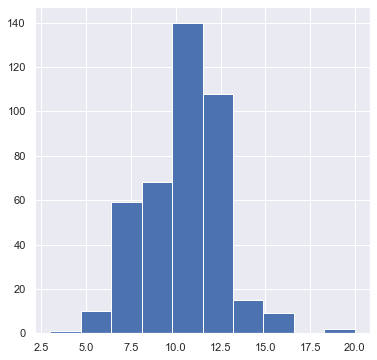

In [60]:
# Determinando si los valores de Highest Education Level son simetricos o asimetricos.
num_df = df['Highest Education Level'].astype(float)
num_df.hist(figsize = (6, 6))
plt

In [61]:
# La variable Highest Education Level se muestra simetrica en plt
# Calculando la media de la columna "Highest Education Level"
avg_bore = df["Highest Education Level"].astype(float).mean(axis = 0)

# Reemplazando "NaN" por el valor de la media
df["Highest Education Level"].replace(np.nan, avg_bore, inplace = True)

C:\Users\ashpe\AppData\Local\Temp\ipykernel_11388\2842330404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Highest Education Level"].replace(np.nan, avg_bore, inplace = True)


In [62]:
# Buscando la moda para la columna Native State y remplazando los datos faltantes por la moda
moda_state = df["Native State"].mode()[0]
df["Native State"].replace(np.nan, moda_state, inplace = True)

C:\Users\ashpe\AppData\Local\Temp\ipykernel_11388\3173113201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Native State"].replace(np.nan, moda_state, inplace = True)


In [63]:
# Revisando que no hay mas datos faltantes en el dataset
datos_faltantes2 = df.isnull()
print("Filas de datos:",df.shape[0],"\n")

print("Cantidad de valores faltantes")
print("-----------------------------")
for column in datos_faltantes2.columns.values.tolist():
    faltantes = datos_faltantes2[column].sum()
    if faltantes > 0:
        print(column + ": " + str(faltantes))   

Filas de datos: 446 

Cantidad de valores faltantes
-----------------------------


Analisis EDA

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 552
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Highest Education Level  446 non-null    float64
 1   Race                     446 non-null    object 
 2   County                   446 non-null    object 
 3   Native State             446 non-null    object 
dtypes: float64(1), object(3)
memory usage: 17.4+ KB


In [65]:
df.describe(include = "all")

,Highest Education Level,Race,County,Native State
count,446.000000,446,446,446
unique,NaN,2,89,43
top,NaN,White,Harris,Texas
freq,NaN,245,112,290
mean,10.401699,NaN,NaN,NaN
std,2.007161,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN
25%,9.000000,NaN,NaN,NaN
50%,10.401699,NaN,NaN,NaN
75%,12.000000,NaN,NaN,NaN


In [66]:

df.dtypes

Highest Education Level    float64
Race                        object
County                      object
Native State                object
dtype: object

In [67]:
cantidad_race = df["Race"].value_counts()
cantidad_race

White    245
Black    201
Name: Race, dtype: int64

In [68]:
cantidad_educacion = df["Highest Education Level"].value_counts()
cantidad_educacion

12.000000    100
10.000000     71
11.000000     69
9.000000      68
8.000000      39
10.401699     34
7.000000      20
14.000000     15
6.000000       8
13.000000      7
15.000000      5
16.000000      4
5.000000       2
12.500000      1
3.000000       1
19.000000      1
20.000000      1
Name: Highest Education Level, dtype: int64

In [69]:
cantidad_state = df["Native State"].value_counts()
cantidad_state

Texas             290
California         18
Louisiana          14
Oklahoma           12
New York            8
Ohio                8
Arkansas            7
Illinois            7
Missouri            7
Georgia             6
Michigan            6
Kentucky            5
Florida             4
Virginia            4
New Mexico          4
Alabama             4
Mississippi         3
Indiana             3
Colorado            3
Wisconsin           3
Germany             3
Tennessee           3
South Carolina      2
North Carolina      2
Washington          2
New Jersey          1
Oregon              1
Vermont             1
West Germany        1
Arizona             1
Philippines         1
Kansas              1
Maryland            1
Minnesota           1
West Virginia       1
Canada              1
Nebraska            1
Utah                1
Netherlands         1
South Dakota        1
France              1
Rhode Island        1
Pennsylvania        1
Name: Native State, dtype: int64

In [70]:
cantidad_county = df["County"].value_counts()
cantidad_county

Harris         112
Dallas          47
Tarrant         36
Bexar           22
Montgomery      15
              ... 
Gillespie        1
Coryell          1
San Jacinto      1
Jones            1
Hardin           1
Name: County, Length: 89, dtype: int64

In [71]:
promedio_race_state = df.reset_index().pivot_table(index = "County", columns = "Race")
promedio_race_state

Highest Education Level        index       
Race                         Black White  Black  White
County                                                
Anderson                  10.70085  11.0  169.5  273.0
Aransas                   11.00000   NaN  423.0    NaN
Atascosa                       NaN   9.0    NaN  214.0
Bastrop                   12.00000   NaN  335.0    NaN
Bee                            NaN   8.0    NaN    9.0
...                            ...   ...    ...    ...
Wharton                        NaN  12.0    NaN   20.0
Wichita                        NaN   9.5    NaN  292.0
Wilbarger                      NaN  17.0    NaN  355.0
Williamson                14.00000   NaN  341.0    NaN
Wood                      10.00000   NaN  115.0    NaN

[89 rows x 4 columns]

<AxesSubplot:xlabel='Highest Education Level'>

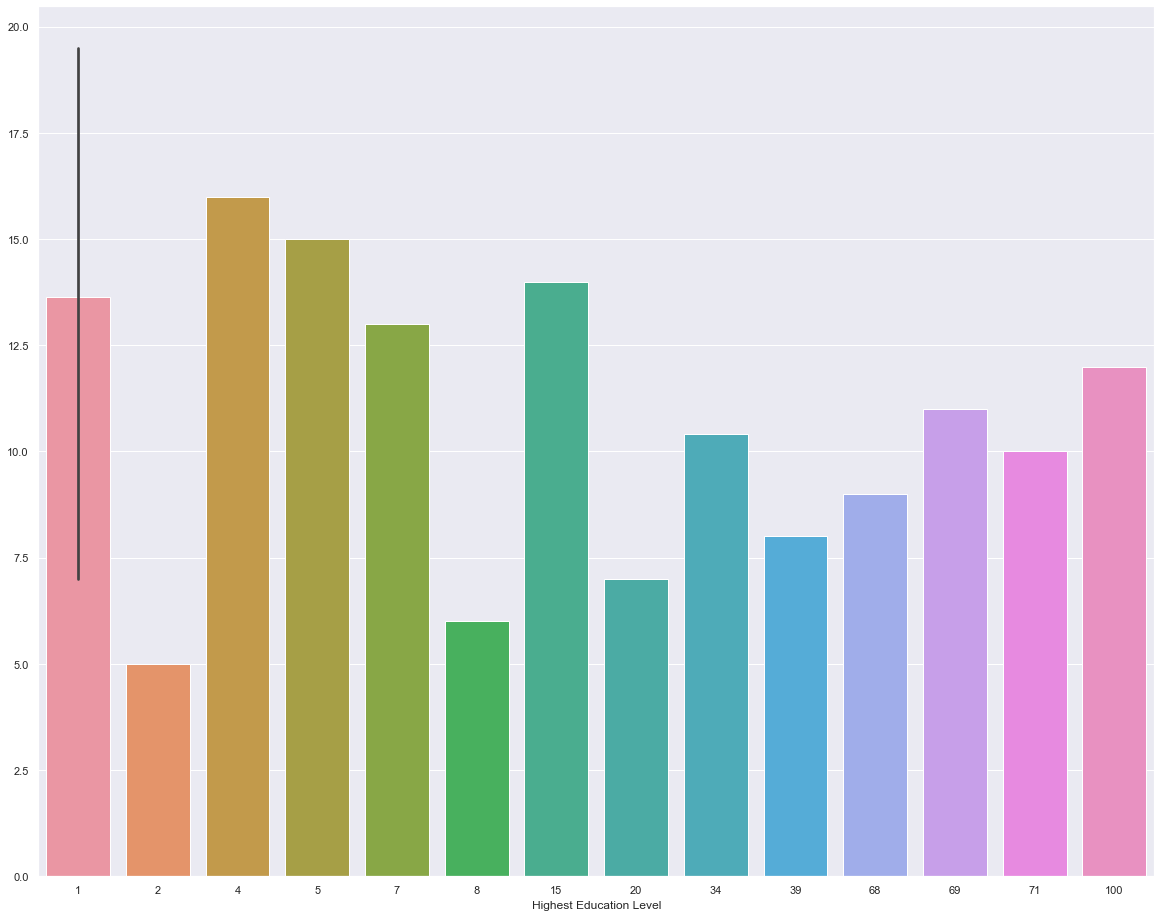

In [72]:
sns.set(rc={'figure.figsize':(20,16)})
sns.barplot(y = cantidad_educacion.index, x = cantidad_educacion)

<AxesSubplot:>

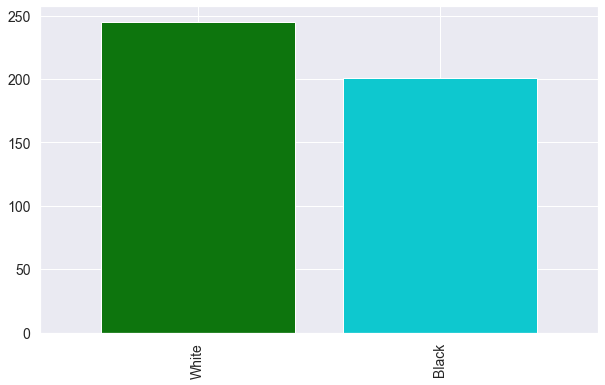

In [73]:
cantidad_race.plot(kind = "bar",
                           figsize = (10,6),
                           width = 0.8,
                           color = ["#0d750d", "#0ec8cf", "#e36671"],
                      fontsize = 14
)

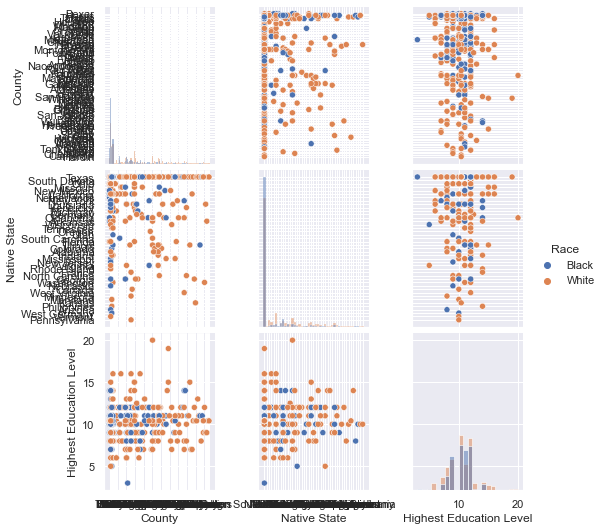

In [74]:
sns.pairplot(data = df, vars = [ "County", "Native State", "Highest Education Level"], hue = "Race", diag_kind = "hist")

In [75]:
# Codificando las variables
race_dummy = pd.get_dummies(df['Race'], prefix='Race', drop_first = True)
df = pd.concat([df, race_dummy], axis=1).drop(columns = ['Race'])

In [76]:
county_dummy = pd.get_dummies(df['County'], prefix='County', drop_first = True)
df = pd.concat([df, county_dummy], axis=1).drop(columns = ['County'])

In [77]:
state_dummy = pd.get_dummies(df['Native State'], prefix='Native State', drop_first = True)
df = pd.concat([df, state_dummy], axis=1).drop(columns = ['Native State'])

In [78]:
df

,Highest Education Level,Race_White,County_Aransas,County_Atascosa,County_Bastrop,County_Bee,County_Bell,County_Bexar,County_Bowie,County_Brazoria,...,Native State_South Dakota,Native State_Tennessee,Native State_Texas,Native State_Utah,Native State_Vermont,Native State_Virginia,Native State_Washington,Native State_West Germany,Native State_West Virginia,Native State_Wisconsin
0,9.000000,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,12.000000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,11.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,12.000000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,12.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,10.401699,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
549,10.401699,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550,10.401699,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
551,6.000000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
# Separando las variables
objetivo = df["Race_White"]
caracteristicas = df.drop(columns = ["Race_White"])

Separación del conjunto de datos

In [80]:
! pip install sklearn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, objetivo, test_size = .3, random_state = 0)


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ashpe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [81]:
# Creando el modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=0.000001, max_iter=200)

# Entrenando el modelo
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, tol=1e-06)

In [82]:
y_eval = lr.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_eval)
score

0.6492537313432836

In [84]:
# Creando el modelo
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

# Entrenando el modelo
tree.fit(X_train, y_train)

# Evaluando
y_eval = tree.predict(X_test)
score = accuracy_score(y_test, y_eval)
score

0.6119402985074627

In [85]:
# Creando el modelo
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(random_state = 0)

# Entrenando el modelo
tree.fit(X_train, y_train)

# Evaluando
y_eval = tree.predict(X_test)
score = accuracy_score(y_test, y_eval)
score

0.5895522388059702